## run this once and install later comment it out

In [ ]:
# !pip install mlcroissant
# !pip install kagglehub[pandas-datasets]
# !pip install matplotlib


# trying kaggle stuff

In [22]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "transportation_data.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "kushagraarya10/cia-global-statistical-database",
  file_path,
)

display(df.head())

,Country,airports_paved_runways_count,airports_unpaved_runways_count,heliports_count,roadways_km,railways_km,waterways_km,gas_pipelines_km,oil_pipelines_km,refined_products_pipelines_km,water_pipelines_km
0,AFGHANISTAN,29,17,1,34903,NaN,1200,466.0,NaN,NaN,NaN
1,AKROTIRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALBANIA,3,NaN,NaN,3945,424,41,498.0,NaN,NaN,NaN
3,ALGERIA,67,82,4,104000,4020,NaN,16415.0,7036.0,NaN,NaN
4,AMERICAN SAMOA,3,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display


In [35]:
DATA_DIR = Path("data")

# this ones needed coz some numbers written like 3,400 which 
# while conversion to df gives error so transforming them 3400
def _coerce_numeric_columns(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if df[column].dtype == object:
            cleaned = pd.to_numeric(
                df[column]
                .astype(str)
                .str.replace(",", "", regex=False)
                .str.replace("\u202f", "", regex=False),
                errors="coerce",
            )
            if cleaned.notna().sum() >= len(cleaned) * 0.8:
                df[column] = cleaned
    return df


def record_to_dataframe(record_id: str) -> pd.DataFrame:
    csv_path = DATA_DIR / record_id

    df = pd.read_csv(
        csv_path,
        thousands=",",
        dtype_backend="numpy_nullable",
    )

    df = _coerce_numeric_columns(df) # the fix for 3,400 to 3400
    return df


def show_dataframe_summary(df: pd.DataFrame, title: str, max_hist_cols: int = 4) -> None:
    print(title, 'shape, its like rows by column', df.shape)
    display(df.head(20))

    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    if not numeric_cols:
        print("No numeric columns available for", title)
        return

    cols_to_plot = numeric_cols[:max_hist_cols]
    _ = df[cols_to_plot].hist(bins=20, figsize=(4 * len(cols_to_plot), 4))
    plt.suptitle(
        f"from {title}", 
        fontsize=14
    )   
    plt.tight_layout()
    plt.show()


communications_data.csv shape, its like rows by column (259, 6)


,Country,telephone_fixed_subscriptions_total,mobile_cellular_subscriptions_total,internet_country_code,internet_users_total,broadband_fixed_subscriptions_total
0,AFGHANISTAN,150000,23000000,.af,7020000,26570
1,AKROTIRI,<NA>,<NA>,<NA>,<NA>,<NA>
2,ALBANIA,197690,2635466,.al,2291000,508937
3,ALGERIA,5097095,47028685,.dz,31240000,3790459
4,AMERICAN SAMOA,10000,2250,.as,18135,<NA>
5,ANDORRA,19075931,56805348,.es,44180000,16188502
6,ANGOLA,119826,15327864,.ao,11550000,230610
7,ANGUILLA,6000,26000,.ai,13056,5000
8,ANTARCTICA,<NA>,<NA>,.aq,4400,<NA>
9,ANTIGUA AND BARBUDA,27000,180000,.ag,89280,8000


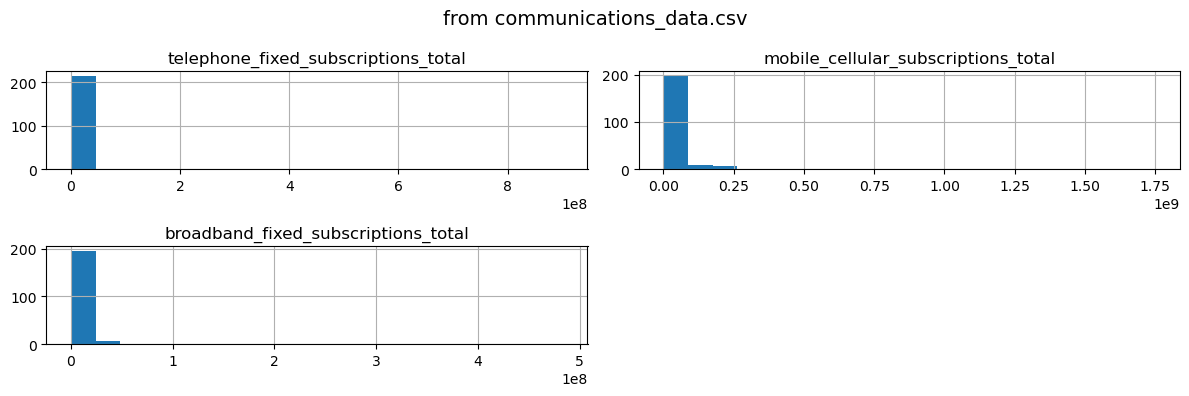

demographics_data.csv shape, its like rows by column (259, 14)


,Country,Total_Population,Population_Growth_Rate,Birth_Rate,Death_Rate,Net_Migration_Rate,Median_Age,Sex_Ratio,Infant_Mortality_Rate,Total_Fertility_Rate,Total_Literacy_Rate,Male_Literacy_Rate,Female_Literacy_Rate,Youth_Unemployment_Rate
0,AFGHANISTAN,39232003,2.26%,34.79,12.08,0.1,19.5,1.02,103.06,4.53,37.3%,39.4%,7.2%,20.2%
1,AKROTIRI,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,ALBANIA,3101621,0.19%,12.48,7.36,3.22,34.3,0.97,10.54,1.55,98.4%,38.8%,6%,27.8%
3,ALGERIA,44758398,1.27%,17.84,4.33,0.81,28.9,1.03,19.22,2.47,81.4%,41.3%,0.7%,31.9%
4,AMERICAN SAMOA,44620,1.74%,16.18,6.19,27.36,27.2,0.99,9.87,2.13,<NA>,<NA>,<NA>,<NA>
5,ANDORRA,85468,0.11%,6.87,7.98,0.0,46.2,1.05,3.39,1.46,100%,35.3%,28.3%,36.9%
6,ANGOLA,35981281,3.34%,41.42,7.8,0.19,15.9,0.96,57.2,5.76,71.1%,82.6%,62.4%,18.5%
7,ANGUILLA,19079,1.77%,11.9,4.72,10.48,35.7,0.89,3.02,1.72,<NA>,<NA>,<NA>,<NA>
8,ANTARCTICA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,ANTIGUA AND BARBUDA,101489,1.13%,15.01,5.69,2.01,32.7,0.89,13.95,1.94,99%,98.4%,99.4%,<NA>


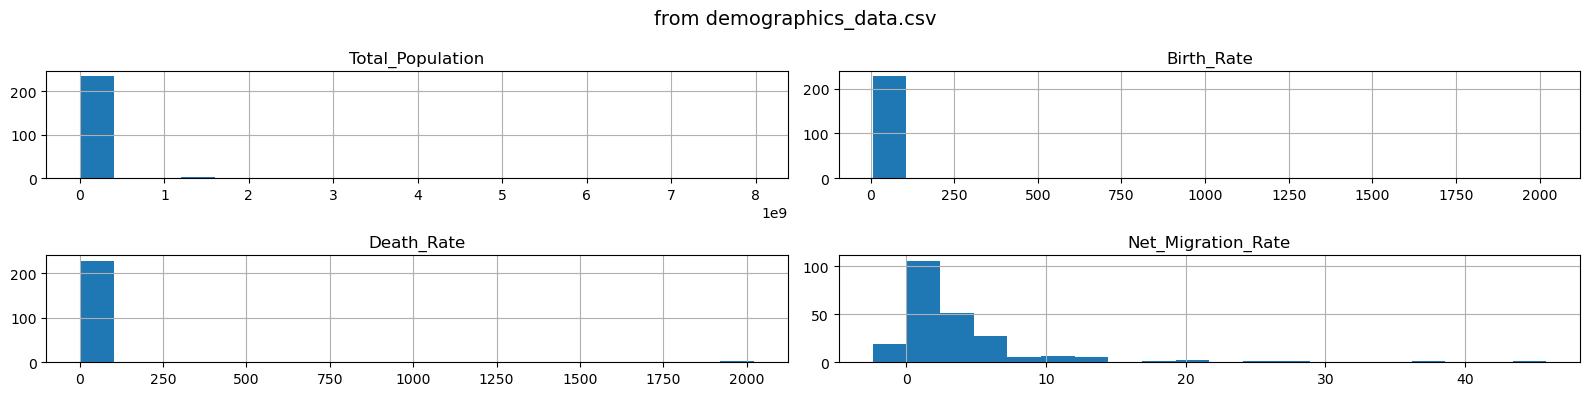

economy_data.csv shape, its like rows by column (259, 16)


,Country,Real_GDP_PPP_billion_USD,GDP_Official_Exchange_Rate_billion_USD,Real_GDP_Growth_Rate_percent,Real_GDP_per_Capita_USD,Unemployment_Rate_percent,Youth_Unemployment_Rate_percent,Budget_billion_USD,Budget_Surplus_billion_USD,Budget_Deficit_percent_of_GDP,Public_Debt_percent_of_GDP,Fiscal_Year,Exports_billion_USD,Imports_billion_USD,Exchange_Rate_per_USD,Population_Below_Poverty_Line_percent
0,AFGHANISTAN,60.8,20.24,-20.74,1500.0,13.28,20.2,5.09,15.1,-15.1,7.0,21 March - 20 March,1.48,6.98,76.814,54.5
1,AKROTIRI,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,ALBANIA,40.82,15.27,8.52,14500.0,11.82,27.8,4.19,2.0,-2.0,84.06,calendar year,5.61,8.0,103.52,14.3
3,ALGERIA,487.72,169.91,3.5,11000.0,12.7,31.9,55.19,9.6,-9.6,27.5,calendar year,41.78,44.32,135.064,5.5
4,AMERICAN SAMOA,658.0,658.0,-1.87,11200.0,29.8,<NA>,249.0,2.1,-2.1,12.2,1 October - 30 September,428.0,615.0,<NA>,<NA>
5,ANDORRA,1798.0,1393351000000.0,5.52,37900.0,14.73,36.9,546.08,3.1,-3.1,141.22,calendar year,497.87,476.68,0.845,20.7
6,ANGOLA,203.87,97.26,1.1,5900.0,8.53,18.5,17.9,6.7,-6.7,65.0,calendar year,33.67,18.84,631.442,32.3
7,ANGUILLA,175.4,175.4,-8.5,12200.0,8.0,<NA>,81.92,0.9,0.9,20.1,1 April - 31 March,7.9,186.2,2.7,23.0
8,ANTARCTICA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,ANTIGUA AND BARBUDA,1.78,1.52,5.27,19100.0,11.0,<NA>,278.0,2.4,-2.4,86.8,1 April - 31 March,749.48,868.8,2.7,<NA>


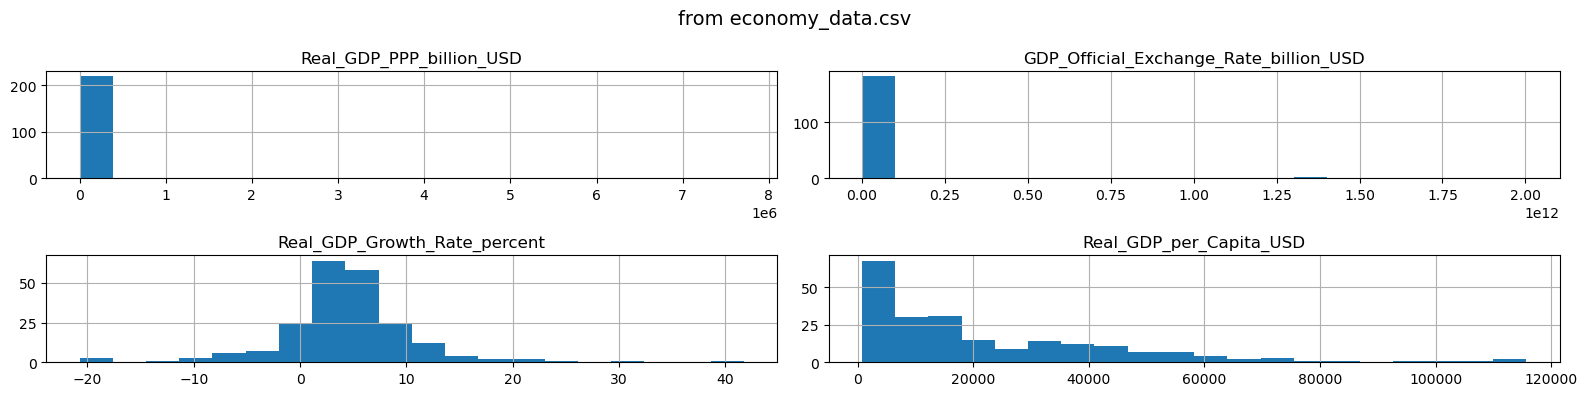

energy_data.csv shape, its like rows by column (259, 10)


,Country,electricity_access_percent,electricity_generating_capacity_kW,coal_metric_tons,petroleum_bbl_per_day,refined_petroleum_products_bbl_per_day,refined_petroleum_exports_bbl_per_day,refined_petroleum_imports_bbl_per_day,natural_gas_cubic_meters,carbon_dioxide_emissions_Mt
0,AFGHANISTAN,97,776000,2096000,0,0,0,34210,80193000,7893000
1,AKROTIRI,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,ALBANIA,100,2531000,9000,16100,5638,3250,26660,42050000,3
3,ALGERIA,99,21694000,0,1414800,627900,578800,82930,87853976000,151
4,AMERICAN SAMOA,59,47000,<NA>,0,0,0,2346,<NA>,355000
5,ANDORRA,100,115837000,546000,47200,1,562400,464800,57990000,280
6,ANGOLA,48,7344000,0,1197600,53480,30340,111600,6767715000,19
7,ANGUILLA,100,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,ANTARCTICA,<NA>,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,28000
9,ANTIGUA AND BARBUDA,100,117000,<NA>,0,0,91,5065,<NA>,729000


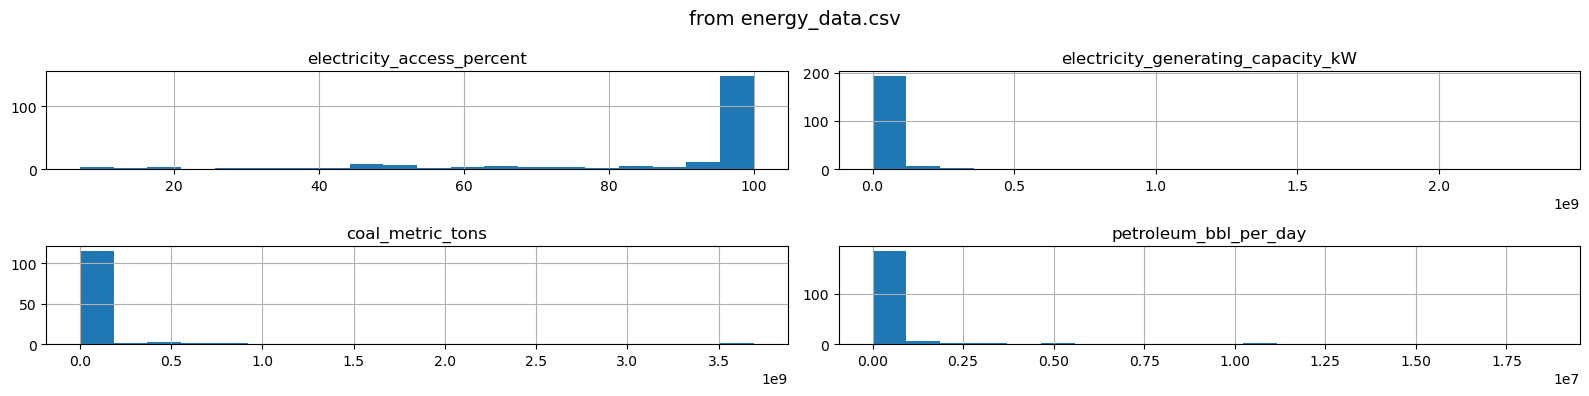

geography_data.csv shape, its like rows by column (259, 16)


,Country,Geographic_Coordinates,Area_Total,Land_Area,Water_Area,Land_Boundaries,Coastline,Highest_Elevation,Lowest_Elevation,Forest_Land,Other_Land,Agricultural_Land,Arable_Land (%% of Total Agricultural Land),Permanent_Crops (%% of Total Agricultural Land),Permanent_Pasture (%% of Total Agricultural Land),Irrigated_Land
0,AFGHANISTAN,"33 00 N, 65 00 E","652,230 sq km","652,230 sq km",0 sq km,"5,987 km",0 km,"7,492 m",258 m,1.8%,40.1%,58.1%,11.8%,0.3%,46%,"24,930 sq km"
1,AKROTIRI,"34 37 N, 32 58 E",123 sq km,<NA>,<NA>,48 km,56.3 km,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,ALBANIA,"41 00 N, 20 00 E","28,748 sq km","27,398 sq km","1,350 sq km",691 km,362 km,"2,764 m",0 m,28.8%,28.2%,42.8%,22.3%,3%,17.4%,"1,820 sq km"
3,ALGERIA,"28 00 N, 3 00 E","2,381,740 sq km","2,381,740 sq km",0 sq km,"6,734 km",998 km,"2,908 m",-40 m,0.8%,81.8%,17.4%,3.2%,0.4%,13.8%,"12,605 sq km"
4,AMERICAN SAMOA,"14 20 S, 170 00 W",224 sq km,224 sq km,0 sq km,0 km,116 km,964 m,0 m,75.5%,0%,24.5%,15%,9.5%,0%,0 sq km
5,ANDORRA,"42 30 N, 1 30 E",468 sq km,468 sq km,0 sq km,118 km,0 km,"2,946 m",840 m,34%,26%,40%,1.7%,0%,38.3%,0 sq km
6,ANGOLA,"12 30 S, 18 30 E","1,246,700 sq km","1,246,700 sq km",0 sq km,"5,369 km","1,600 km","2,620 m",0 m,54.3%,<NA>,45.7%,3.9%,0.3%,41.5%,860 sq km
7,ANGUILLA,"18 15 N, 63 10 W",91 sq km,91 sq km,0 sq km,0 km,61 km,73 m,0 m,61.1%,38.9%,0%,0%,0%,0%,0 sq km
8,ANTARCTICA,"90 00 S, 0 00 E",14.2 million sq km,"285,000 sq km",<NA>,<NA>,"17,968 km","4,892 m","-3,500 m",<NA>,<NA>,0%,<NA>,<NA>,<NA>,<NA>
9,ANTIGUA AND BARBUDA,"17 03 N, 61 48 W",443 sq km,443 sq km,0 sq km,0 km,153 km,402 m,0 m,18.8%,60.8%,20.5%,9%,2.3%,9%,1.3 sq km


No numeric columns available for geography_data.csv
government_and_civics_data.csv shape, its like rows by column (253, 5)


,Country,Capital,Capital_Coordinates,Government_Type,Suffrage_Age
0,AFGHANISTAN,Kabul,"34 31 N, 69 11 E",Theocracy,18.0
1,AKROTIRI,Episkopi Cantonment,"34 40 N, 32 51 E",<NA>,<NA>
2,ALBANIA,Tirana,"41 19 N, 19 49 E",Republic,18.0
3,ALGERIA,Algiers,"36 45 N, 3 03 E",Republic,18.0
4,AMERICAN SAMOA,Pago Pago,"14 16 S, 170 42 W",Republic,18.0
5,ANDORRA,Andorra la Vella,"42 30 N, 1 31 E",Democracy,18.0
6,ANGOLA,Luanda,"8 50 S, 13 13 E",Republic,18.0
7,ANGUILLA,The Valley,"18 13 N, 63 03 W",Democracy,18.0
8,ANTARCTICA,<NA>,<NA>,Other,<NA>
9,ANTIGUA AND BARBUDA,Saint John’s,"17 07 N, 61 51 W",Democracy,18.0


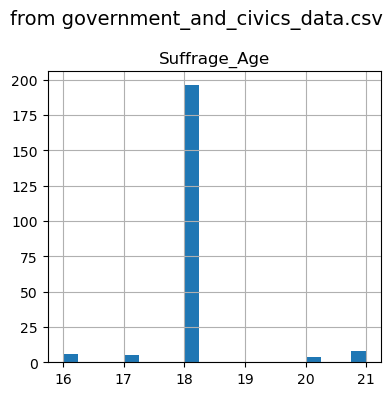

transportation_data.csv shape, its like rows by column (259, 11)


,Country,airports_paved_runways_count,airports_unpaved_runways_count,heliports_count,roadways_km,railways_km,waterways_km,gas_pipelines_km,oil_pipelines_km,refined_products_pipelines_km,water_pipelines_km
0,AFGHANISTAN,29,17,1,34903,<NA>,1200,466,<NA>,<NA>,<NA>
1,AKROTIRI,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,ALBANIA,3,<NA>,<NA>,3945,424,41,498,<NA>,<NA>,<NA>
3,ALGERIA,67,82,4,104000,4020,<NA>,16415,7036,<NA>,<NA>
4,AMERICAN SAMOA,3,<NA>,<NA>,241,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,ANDORRA,0,0,0,269,0,0,<NA>,<NA>,<NA>,<NA>
6,ANGOLA,32,70,1,26000,2761,1300,352,1065,<NA>,<NA>
7,ANGUILLA,1,93,<NA>,175,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,ANTARCTICA,17,17,53,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,ANTIGUA AND BARBUDA,2,1,<NA>,1170,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


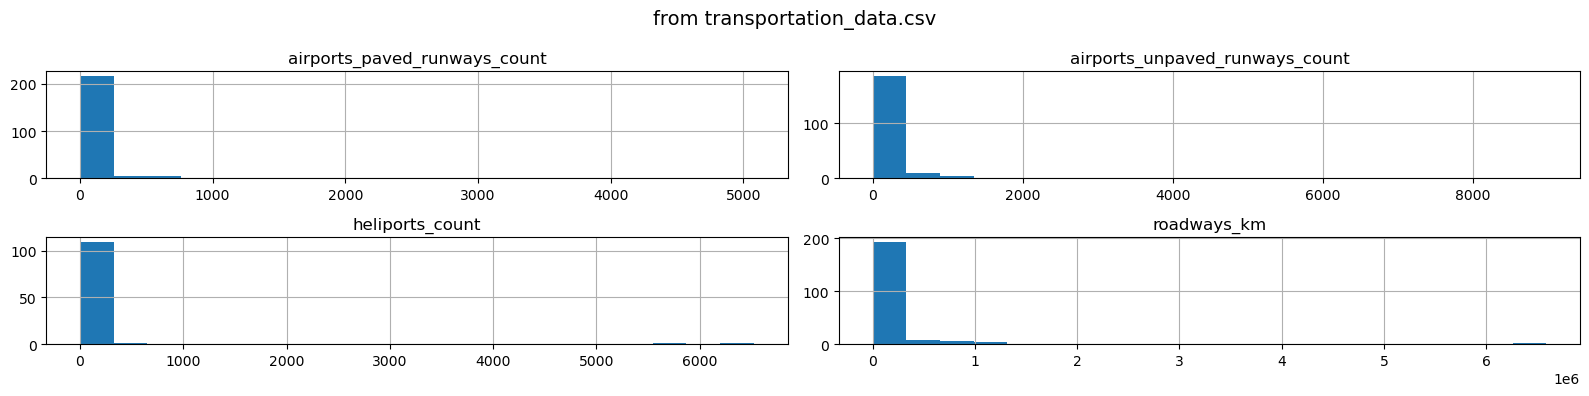

In [36]:
for record_id in record_set_ids:
    df = record_to_dataframe(record_id)
    show_dataframe_summary(df, title=record_id)
